# Challenge Set 2:  Pandas (movies data)


**Topic**: Pandas (Exploring and visualizing our scraped movie data in pandas)

Just getting started? Read this guide: [10 minutes to pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html)

**Data**: Your own data! But: if you don't have movie data to work on yet, you can use some data on the top grossing 100 movies from 2013, scraped from Box Office Mojo: `2013_movies.csv`


---

In [42]:
from __future__ import print_function, division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from pprint import pprint
import dateutil
import os

%matplotlib inline

In [43]:
os.chdir('/Users/KVASU/Metis/sf16_ds4/challenges/02-pandas')
df = pd.read_csv("2013_movies.csv")
df

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,11/22/13 0:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,5/3/13 0:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,11/22/13 0:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,7/3/13 0:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,6/14/13 0:00
5,Gravity,100000000.0,274092705,Alfonso Cuaron,PG-13,91,10/4/13 0:00
6,Monsters University,NaN,268492764,Dan Scanlon,G,107,6/21/13 0:00
7,The Hobbit: The Desolation of Smaug,NaN,258366855,Peter Jackson,PG-13,161,12/13/13 0:00
8,Fast & Furious 6,160000000.0,238679850,Justin Lin,PG-13,130,5/24/13 0:00
9,Oz The Great and Powerful,215000000.0,234911825,Sam Raimi,PG,127,3/8/13 0:00


#### Exercise 2.1

Plot domestic total gross over time.


In [44]:
df["DATE_TIME"] = df['ReleaseDate'] = df.ReleaseDate.apply(dateutil.parser.parse)
df

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,DATE_TIME
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22,2013-11-22
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03,2013-05-03
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22,2013-11-22
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03,2013-07-03
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14,2013-06-14
5,Gravity,100000000.0,274092705,Alfonso Cuaron,PG-13,91,2013-10-04,2013-10-04
6,Monsters University,NaN,268492764,Dan Scanlon,G,107,2013-06-21,2013-06-21
7,The Hobbit: The Desolation of Smaug,NaN,258366855,Peter Jackson,PG-13,161,2013-12-13,2013-12-13
8,Fast & Furious 6,160000000.0,238679850,Justin Lin,PG-13,130,2013-05-24,2013-05-24
9,Oz The Great and Powerful,215000000.0,234911825,Sam Raimi,PG,127,2013-03-08,2013-03-08


In [45]:
df = df.sort_values('DATE_TIME')

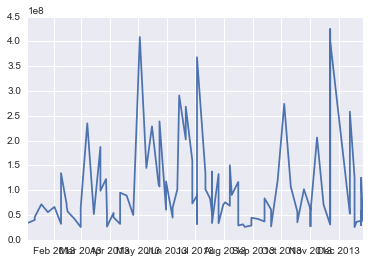

In [46]:
plt.plot(df['DATE_TIME'],df['DomesticTotalGross'])

#### Exercise 2.2

Plot runtime vs. domestic total gross.




In [47]:
df = df.sort_values('Runtime')

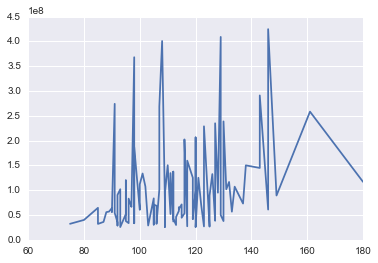

In [48]:
plt.plot(df['Runtime'],df['DomesticTotalGross'])

#### Exercise 2.3

Group your data by Rating and find the average runtime and domestic total gross at each level of Rating.



In [49]:
df_groupby = df.groupby(df['Rating']).count().reset_index()
df_groupby

,Rating,Title,Budget,DomesticTotalGross,Director,Runtime,ReleaseDate,DATE_TIME
0,G,1,0,1,1,1,1,1
1,PG,15,15,15,14,15,15,15
2,PG-13,47,41,47,45,47,47,47
3,R,37,33,37,36,37,37,37


In [50]:
df_groupby = df.groupby(df['Rating']).mean().reset_index()
df_groupby


,Rating,Budget,DomesticTotalGross,Runtime
0,G,NaN,2.684928e+08,107.000000
1,PG,9.393333e+07,1.311357e+08,99.933333
2,PG-13,9.660976e+07,1.114498e+08,117.510638
3,R,3.886364e+07,6.989243e+07,110.729730



# Exercise 2.4 NEED TO PLOT AS SUBPLOTS!!!!!!!!!!!

Make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gross.




In [51]:
df

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,DATE_TIME
86,Kevin Hart: Let Me Explain,NaN,32244051,NaN,R,75,2013-07-03,2013-07-03
76,A Haunted House,2500000.0,40041683,Michael Tiddes,R,80,2013-01-11,2013-01-11
54,The Purge,3000000.0,64473115,James DeMonaco,R,85,2013-06-07,2013-06-07
88,Scary Movie 5,20000000.0,32015787,Malcolm D. Lee,PG-13,85,2013-04-12,2013-04-12
81,Walking with Dinosaurs,80000000.0,36076121,Barry CookNeil Nightingale,PG,87,2013-12-20,2013-12-20
63,Hansel and Gretel: Witch Hunters,50000000.0,55703475,Tommy Wirkola,R,88,2013-01-25,2013-01-25
60,Escape From Planet Earth,40000000.0,57012977,Cal Brunker,PG,89,2013-02-15,2013-02-15
55,Last Vegas,28000000.0,63914167,Jon Turteltaub,PG-13,90,2013-11-01,2013-11-01
62,Free Birds,55000000.0,55750480,Jimmy Hayward,PG,90,2013-11-01,2013-11-01
5,Gravity,100000000.0,274092705,Alfonso Cuaron,PG-13,91,2013-10-04,2013-10-04


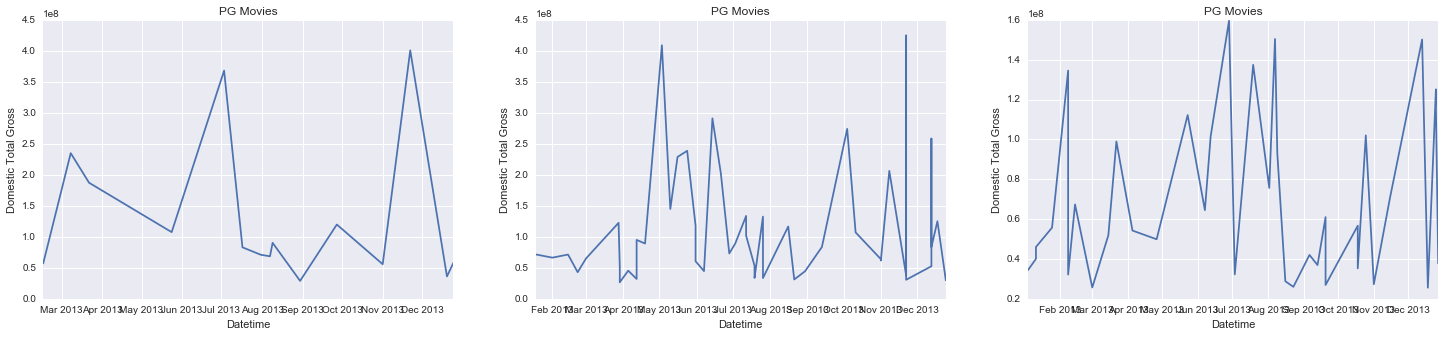

In [52]:
df = df.sort_values('DATE_TIME')

#df_g = df[df['Rating'].isin(['G'])].reset_index()
df_pg = df[df['Rating'].isin(['PG'])].reset_index()
df_pg13 = df[df['Rating'].isin(['PG-13'])].reset_index()
df_r = df[df['Rating'].isin(['R'])].reset_index()

#x1 = df_g['DATE_TIME']
x2 = df_pg['DATE_TIME']
x3 = df_pg13['DATE_TIME']
x4 = df_r['DATE_TIME']

#y1 = df_g['DomesticTotalGross']
y2 = df_pg['DomesticTotalGross']
y3 = df_pg13['DomesticTotalGross']
y4 = df_r['DomesticTotalGross']

# df.groupby(['Rating', 'Title', 'ReleaseDate']).sum().reset_index()
df_pg = df.loc[df.Rating == 'PG']
df_pg13 = df.loc[df.Rating == 'PG-13']
df_r = df.loc[df.Rating == 'R']

plt.figure(figsize=(25,5))
plt.subplot(131)
plt.title('PG Movies')
plt.xlabel('Datetime')
plt.ylabel('Domestic Total Gross')
plt.plot(x2,y2)

plt.subplot(132)
plt.title('PG Movies')
plt.xlabel('Datetime')
plt.ylabel('Domestic Total Gross')
plt.plot(x3,y3)

plt.subplot(133)
plt.title('PG Movies')
plt.xlabel('Datetime')
plt.ylabel('Domestic Total Gross')
plt.plot(x4,y4)


#### Exercise 2.5

What director in your dataset has the highest gross per movie?




In [53]:
df_directors = df.groupby(df['Director']).mean().reset_index()
df_directors.sort_values('DomesticTotalGross',ascending=False)

,Director,Budget,DomesticTotalGross,Runtime
27,Francis Lawrence,130000000.0,424668047.0,146.0
81,Shane Black,200000000.0,409013994.0,129.0
15,Chris BuckJennifer Lee,150000000.0,400738009.0,108.0
71,Pierre CoffinChris Renaud,76000000.0,368061265.0,98.0
92,Zack Snyder,225000000.0,291045518.0,143.0
2,Alfonso Cuaron,100000000.0,274092705.0,91.0
17,Dan Scanlon,NaN,268492764.0,107.0
69,Peter Jackson,NaN,258366855.0,161.0
49,Justin Lin,160000000.0,238679850.0,130.0
79,Sam Raimi,215000000.0,234911825.0,127.0


#### Exercise 2.6

Bin your dataset into months and make a bar graph of the mean domestic total gross by month.  Error bars will represent the standard error of the mean.

Title of graph should include:  Mean Domestic Total Gross by Month in 2013

Topic for consideration:  what is the correct formula for the standard error of the mean?  Examine the error bars and see if they are "reasonable."



In [54]:
df2 = df.groupby([pd.Grouper(key='ReleaseDate', freq='M'),]).aggregate(['count', 'std'])
df2 = df2.DomesticTotalGross.reset_index()
df2['Error'] = df2['std']/df2['count']**0.5

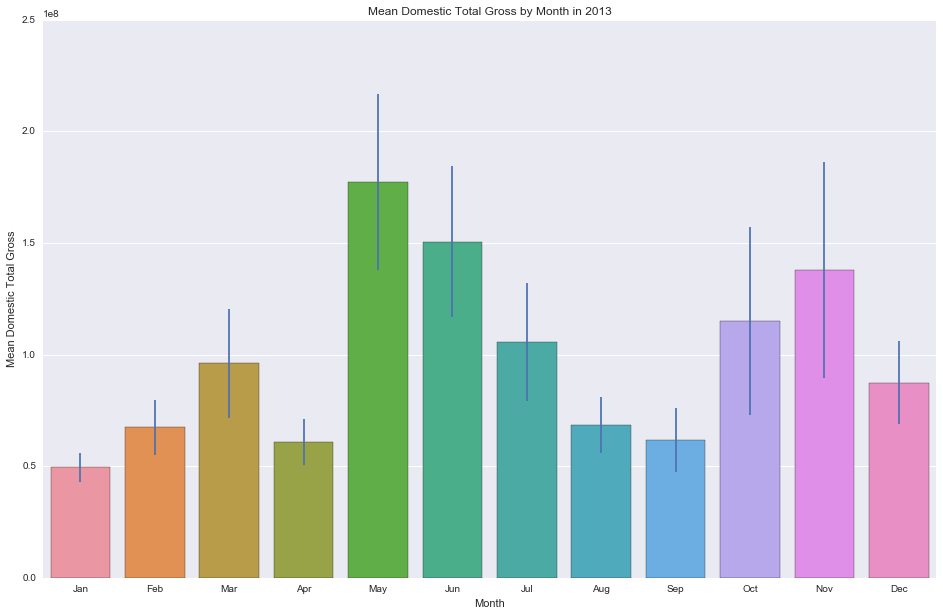

In [55]:
df_month = df.groupby([pd.Grouper(key='ReleaseDate', freq='M')]).mean()
plt.figure(figsize =(16,10))
plt.title('Mean Domestic Total Gross by Month in 2013')
sns.barplot(df_month.index, df_month.DomesticTotalGross, yerr=df2.Error, capsize=2, errwidth=2)\
.set(ylabel = 'Mean Domestic Total Gross', xlabel = 'Month',\
     xticklabels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']);